<a href="https://colab.research.google.com/github/Laura-Neff/Discretization/blob/main/Discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np

#Discretization is often performed to simplify data you are working with

In [47]:
X = np.array([-7, 2, -3, -11, 14, 6, 8])

In [48]:
categories = pd.cut(X, 4)

categories

#Categorize data and use cut function to bucketize and bend your data
#cut function examines numeric continuous values and generates the number of intervals you tell it to
#each interval represents a bucket/category 

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64, right]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [49]:
categories.categories
#The interval is like this: number next to "(" is not included, but number next to "]" is included
#Right is always included and left isn't

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]], dtype='interval[float64, right]')

In [50]:
categories.codes
#here we have numeric identifiers for each bucket
#we can see the first number in our array belongs to the first bucket and the last number in our array belongs to our last bucket

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [51]:
categories.ordered
#There is an inherent ordering to our categories

True

In [52]:
pd.cut(X, 4, retbins=True)
#returns bin information and tells you where edges are 

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64, right]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

In [53]:
marks = np.array([70, 20, 30, 99, 40, 16, 80])

In [54]:
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])
#categorize the four bins we have and assign labels to them 

In [55]:
categories

['good', 'poor', 'poor', 'excellent', 'average', 'poor', 'excellent']
Categories (4, object): ['poor' < 'average' < 'good' < 'excellent']

In [56]:
categories.categories
#You can get meaningful categories for your continuous numerical data by using labels with pandas.cut

Index(['poor', 'average', 'good', 'excellent'], dtype='object')

In [57]:
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

In [58]:
df = pd.Series(marks, index = [1, 2, 3, 4, 5, 6, 7])

df

1    70
2    20
3    30
4    99
5    40
6    16
7    80
dtype: int64

In [59]:
categories, bins = pd.cut(df, 4, retbins=True)

In [60]:
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

In [61]:
from sklearn.preprocessing import KBinsDiscretizer #estimator object that discretizes continuous data

In [62]:
marks = [[70], [20], [30], [99], [40], [16], [80]] #Use same marks data but represent it as 2D list

In [63]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform') #bin marks into 4 categories; encode bin identifiers as integer values, so encode = "ordinal"
#can also set that to one-hot encoding
#strategy here is uniform, which means all bins for each feature will have identical widths 

In [64]:
enc.fit(marks) #encode marks data 

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [65]:
enc.transform(marks) #get discretized or categorical values

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [66]:
enc.bin_edges_ #see edges of each bin

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

In [67]:
X = [[-21, 41, -14],
     [-13, 23, -31],
     [  9, 30, -5],
     [  0, 24, -17]]

In [68]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
#discretize all 3 features/columns into 4 separate bins
#quantile = all bins in each feature will have the same number of points
#the bin intervals will be different to accomodate the same number of points in each feature 

In [69]:
enc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=4)

In [70]:
X_trans = enc.transform(X)

X_trans

#Buckets are different for each feature
#We have 4 bins and 4 records
#for each feature, there is exactly 1 data point in each bin

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [71]:
enc.bin_edges_
#the bin intervals change to accomodate exactly the same number of data points for each feature 

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

In [72]:
enc.inverse_transform(X_trans)
#The inverse_transform function converts the binned data into the original feature space. Each value will be equal to the mean of the two bin edges.

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

Now we will build a regression model with original data and with discretized data

In [73]:
automobile_df = pd.read_csv('auto_mpg_processed.csv')

automobile_df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


Here we are taking horsepower column as feature and the predicting the mpg value

In [74]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

In [75]:
X.sample(10)

,Horsepower
141,93
177,83
331,84
236,66
206,150
92,100
191,78
62,150
279,135
377,92


In [76]:
import matplotlib.pyplot as plt

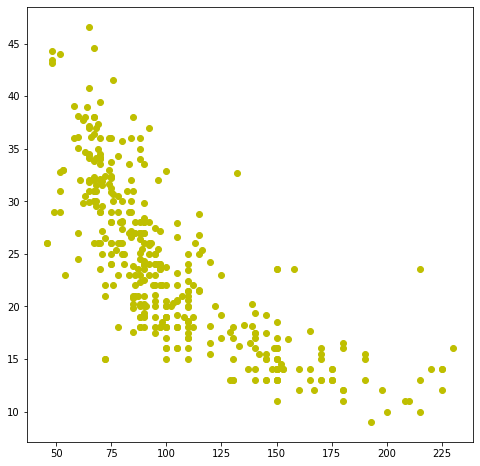

In [77]:
plt.figure(figsize=(8, 8))

plt.plot(X, Y, 'o', c='y')

plt.show()

#Faster the car, less MPG it has 

#We will now discretize our numerical data/group it because there is no need to show this much data on our plot if a car with a horsepower of 95 will not be different than one of 100

#Also, as a heads up for the future: when you see linear relationships in your plotted data, you want to make linear models
#When you see curvy graphs: use something else

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
#fit a simple linear model on the original continuous data

In [80]:
#instantiate the LinearRegression estimator object, call fit on training data, and use model for prediction
reg = LinearRegression().fit(x_train, y_train)

In [81]:
y_pred = reg.predict(x_test)

y_pred

#from test data we have of horsepower, get MPG

array([18.06646127, 24.32032345, 29.01072008, 25.10205622, 29.47975974,
       24.32032345, 16.50299573, 22.7568579 , 28.69802697, 26.1964821 ,
       29.01072008, 27.44725453, 31.6686115 , 25.88378899, 10.24913356,
        6.3404697 , 29.01072008, 25.10205622, 29.79245285, 10.24913356,
       28.22898731, 25.88378899, 29.47975974, 22.7568579 , 26.66552176,
       15.72126296, 23.53859068, 16.81568884, 25.10205622,  8.68566802,
       14.15779742, 24.78936311, 21.19339236, 31.51226495, 25.41474933,
       26.1964821 , 26.97821487, 16.50299573, 26.66552176, 28.85437352,
       32.45034427, 27.75994764, 16.50299573, 23.53859068, 26.66552176,
       25.88378899, 18.06646127, 28.07264075, 26.1964821 , 25.88378899,
       28.22898731, 12.59433187, 25.88378899, 25.88378899, 26.1964821 ,
       24.32032345, 26.1964821 , 27.44725453, 20.41165959, 24.32032345,
       11.8125991 , 28.69802697, 26.66552176, 32.45034427, 25.57109588,
       29.79245285, 25.88378899, 30.10514596, 17.2847285 , 29.79

In [82]:
from sklearn.metrics import r2_score

print("r_2 score: ", r2_score(y_test, y_pred))
#Decent

r_2 score:  0.5345568398499687


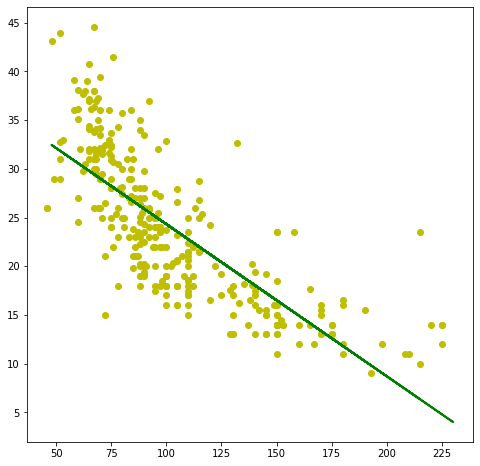

In [83]:
plt.figure(figsize=(8, 8))

plt.plot(x_train, y_train, 'o', c='y')

plt.plot(x_test, y_pred, linewidth=2, color='green',
         linestyle='-', label='linear regression')

plt.show()

#Original data vs. fitted line --> line models underlying data pretty well
#Model has pretty good predictive power knowing we only gave it 1 feature

In [84]:
enc = KBinsDiscretizer(n_bins=20, encode='ordinal') #Now discretize our horsepower values into 20 separate bins

x_binned = enc.fit_transform(x_train)

#We are discretizing our data because we see how a car with a horsepower of 96 vs. 95 won't make a difference in the relationship with MPG
#If we want to discretize our data, we have to discretize it before feeding it to the machine learning model too

In [85]:
x_binned[:10]

array([[ 0.],
       [ 6.],
       [ 0.],
       [12.],
       [19.],
       [12.],
       [16.],
       [ 6.],
       [ 5.],
       [ 3.]])

In [86]:
x_test_binned = enc.transform(x_test)

In [87]:
reg = LinearRegression().fit(x_binned, y_train)

In [88]:
_pred = reg.predict(x_test_binned)

y_pred

array([18.06646127, 24.32032345, 29.01072008, 25.10205622, 29.47975974,
       24.32032345, 16.50299573, 22.7568579 , 28.69802697, 26.1964821 ,
       29.01072008, 27.44725453, 31.6686115 , 25.88378899, 10.24913356,
        6.3404697 , 29.01072008, 25.10205622, 29.79245285, 10.24913356,
       28.22898731, 25.88378899, 29.47975974, 22.7568579 , 26.66552176,
       15.72126296, 23.53859068, 16.81568884, 25.10205622,  8.68566802,
       14.15779742, 24.78936311, 21.19339236, 31.51226495, 25.41474933,
       26.1964821 , 26.97821487, 16.50299573, 26.66552176, 28.85437352,
       32.45034427, 27.75994764, 16.50299573, 23.53859068, 26.66552176,
       25.88378899, 18.06646127, 28.07264075, 26.1964821 , 25.88378899,
       28.22898731, 12.59433187, 25.88378899, 25.88378899, 26.1964821 ,
       24.32032345, 26.1964821 , 27.44725453, 20.41165959, 24.32032345,
       11.8125991 , 28.69802697, 26.66552176, 32.45034427, 25.57109588,
       29.79245285, 25.88378899, 30.10514596, 17.2847285 , 29.79

In [89]:
r2_score(y_test, y_pred)
#Supposed to be better than the score we had before discretizing data, but perhaps times have changed

0.5345568398499687

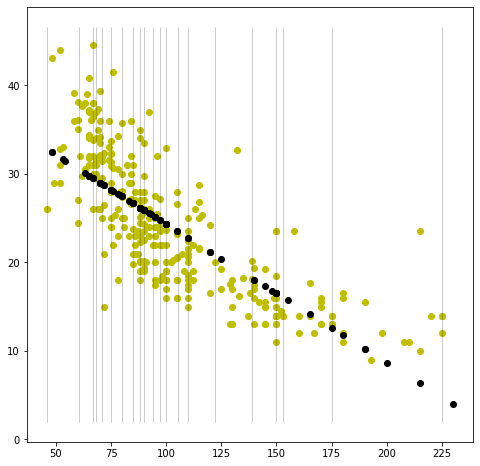

In [90]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='y')
plt.scatter(x_test, y_pred, color='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

plt.show()